In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

import pickle
from pathlib import Path

In [3]:
import pandas as pd

# import dataset
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

# menampilkan data
print(df.head())

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  
0       Sector              9497927  
1      Cluster              2722700  
2      Cluster              5286429  
3      Cluster              5204498  
4      Cluster             10615206  


In [4]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_3784\1197788937.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[kol], ax = axs[i][1])
C:\Users\User\AppData\Local\Temp\ipykernel_3784\1197788937.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[kol], ax = axs[i][1])


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: float or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: :mpltype:`color`
  figure: `~matplotlib.figure.Figure` or `~matplotlib.figure.SubFigure`
  forward_navigation_events: bool or "auto"
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: list of `.AbstractPathEffect`
  picker: None or bool or float or c

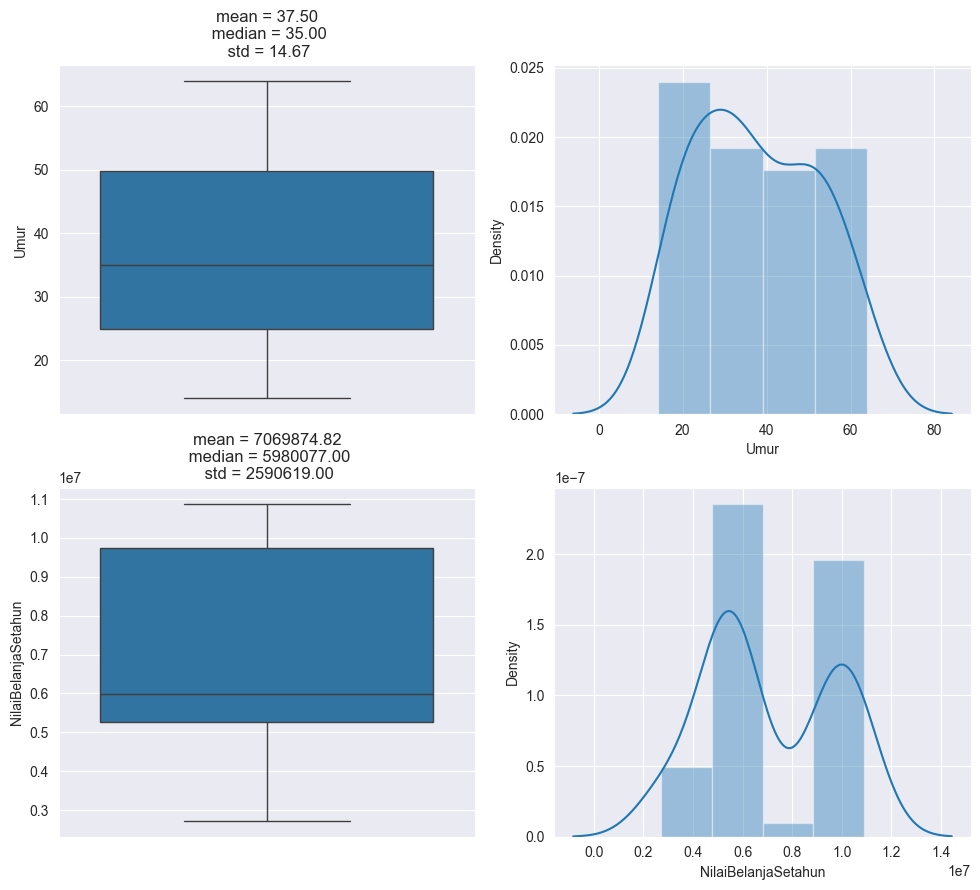

In [5]:
# Fungsi untuk membuat plot
def observasi_num(features):
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()

# Memanggil fungsi untuk membuat Plot untuk data numerik
kolom_numerik = ['Umur','NilaiBelanjaSetahun']
observasi_num(kolom_numerik)

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: float or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: :mpltype:`color`
  figure: `~matplotlib.figure.Figure` or `~matplotlib.figure.SubFigure`
  forward_navigation_events: bool or "auto"
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: list of `.AbstractPathEffect`
  picker: None or bool or float or c

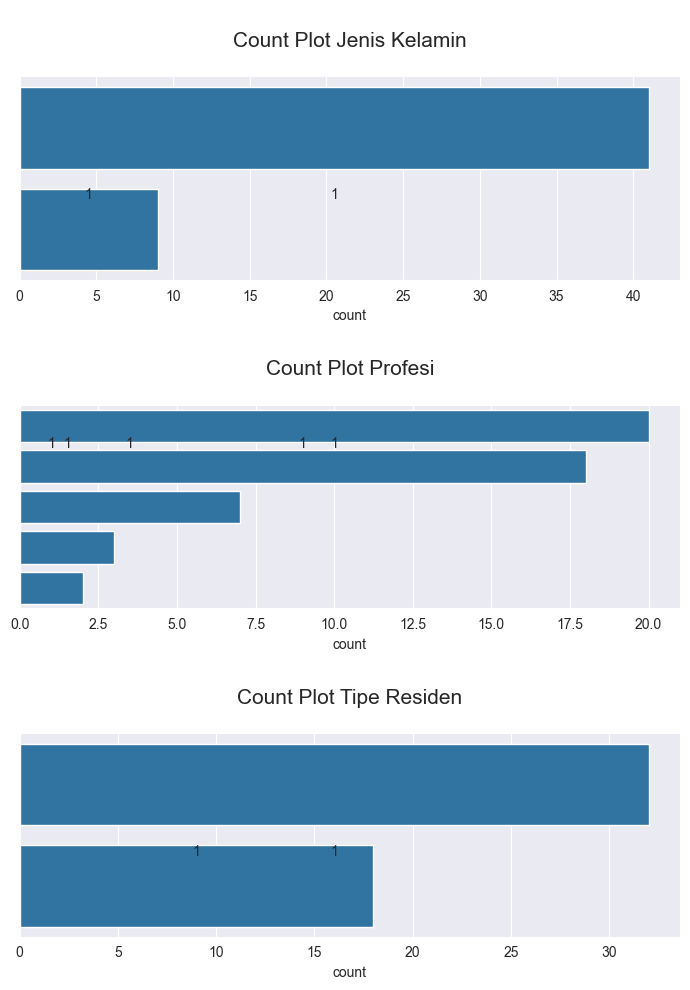

In [6]:
# Menyiapkan kolom kategorikal
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

# Membuat canvas
fig, axs = plt.subplots(3,1,figsize=(7,10))

# Membuat plot untuk setiap kolom kategorikal
for i, kol in enumerate(kolom_kategorikal):
    # Membuat Plot
    sns.countplot(df[kol], order = df[kol].value_counts().index, ax = axs[i])
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)

    # Memberikan anotasi
    for p in axs[i].patches:
        axs[i].annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 10),
                        textcoords = 'offset points')

    # Setting Plot
    sns.despine(right=True,top = True, left = True)
    axs[i].axes.yaxis.set_visible(False)
    plt.setp(axs[i])
    plt.tight_layout()

# Tampilkan plot
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

kolom_numerik = ['Umur','NilaiBelanjaSetahun']

# Statistik sebelum Standardisasi
print('Statistik Sebelum Standardisasi\n')
print(df[kolom_numerik].describe().round(1))

# Standardisasi
df_std = StandardScaler().fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistic
print('Contoh hasil standardisasi\n')
print(df_std.head())

print('Statistik hasil standardisasi\n')
print(df_std.describe().round(0))

Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Contoh hasil standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   -0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


In [8]:
# Membuat salinan data frame
df_encode = df[kolom_kategorikal].copy()


# Melakukan labelEncoder untuk semua kolom kategorikal
for col in kolom_kategorikal:
	df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menampilkan data
print(df_encode.head())

   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


In [9]:
# Menggabungkan data frame
df_model= df_encode.merge(df_std, left_index = True, right_index=True, how= 'left')
print(df_model.head())

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421
